In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

In [16]:
df = pd.read_csv("../data/processed/processed.csv")
df.head()


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,Low


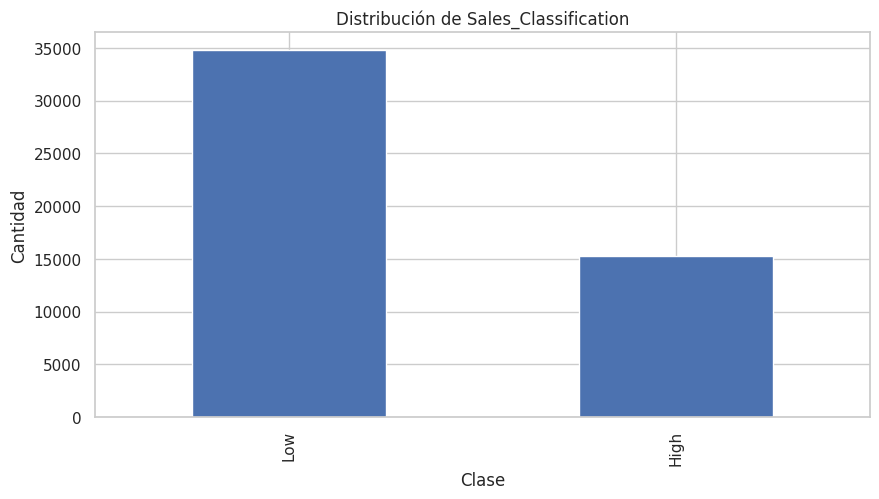

In [17]:
df['Sales_Classification'].value_counts().plot(kind="bar")
plt.title("Distribución de Sales_Classification")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()

Existe una alta desproporción entre las clases:
Low tiene más del doble de registros comparado con High.
Esto indica que la mayoría de los vehículos analizados pertenecen a un nivel de ventas bajo.
Esto nos genera un dataset desbalanceado

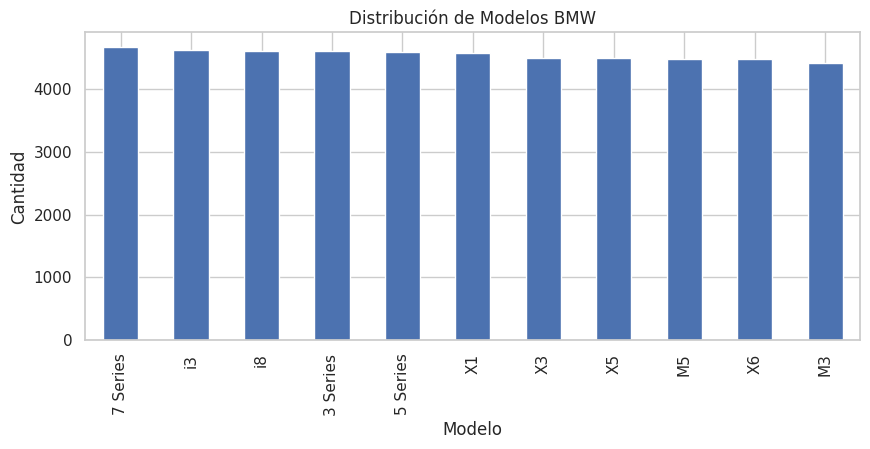

In [18]:
df['Model'].value_counts().plot(kind="bar", figsize=(10,4))
plt.title("Distribución de Modelos BMW")
plt.xlabel("Modelo")
plt.ylabel("Cantidad")
plt.show()

Todos los modelos tienen una cantidad bastante similar, alrededor de 4500 vehículos cada uno.
No hay un modelo dominante ni uno extremadamente minoritario.
Esto sugiere que el conjunto de datos está equilibrado por modelo, lo cual es positivo para análisis comparativos y modelado.

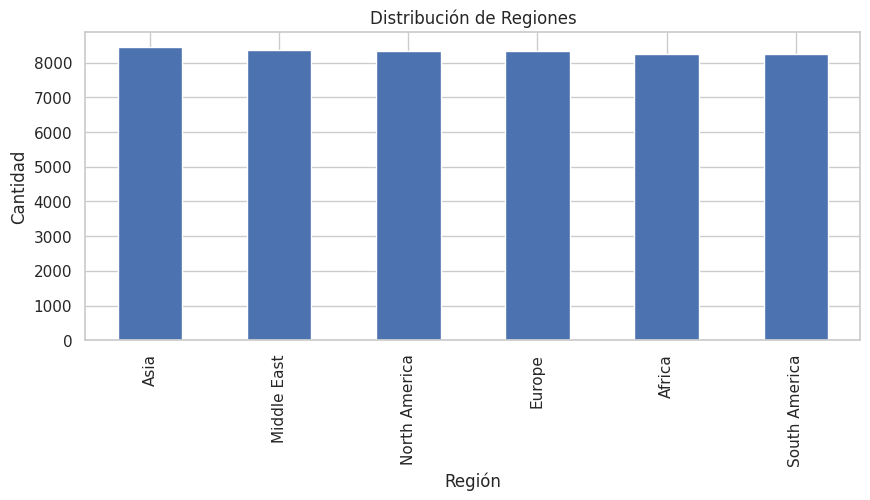

In [19]:
df['Region'].value_counts().plot(kind="bar", figsize=(10,4))
plt.title("Distribución de Regiones")
plt.xlabel("Región")
plt.ylabel("Cantidad")
plt.show()

Las regionespresentan cantidades casi idénticas.
Esto indica un conjunto de datos bien distribuido geográficamente, sin sesgos significativos.
Permite realizar análisis por región sin problemas de desequilibrio.

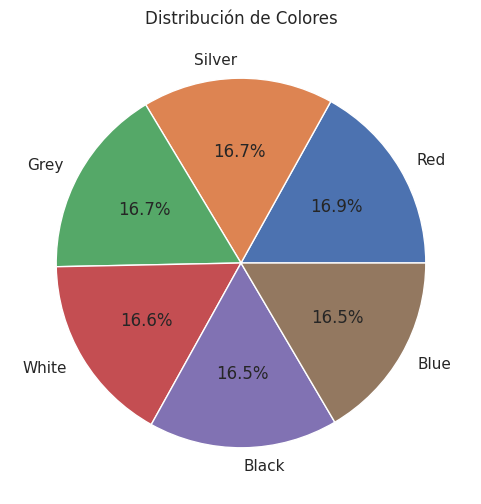

In [20]:
df['Color'].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
plt.title("Distribución de Colores")
plt.ylabel("")
plt.show()

Ningún color domina claramente las preferencias.
Todos los colores están entre 16% y 17%.
Podems ver una oferta equilibrada y no existe un color especialmente popular o raro en el conjunto de datos.

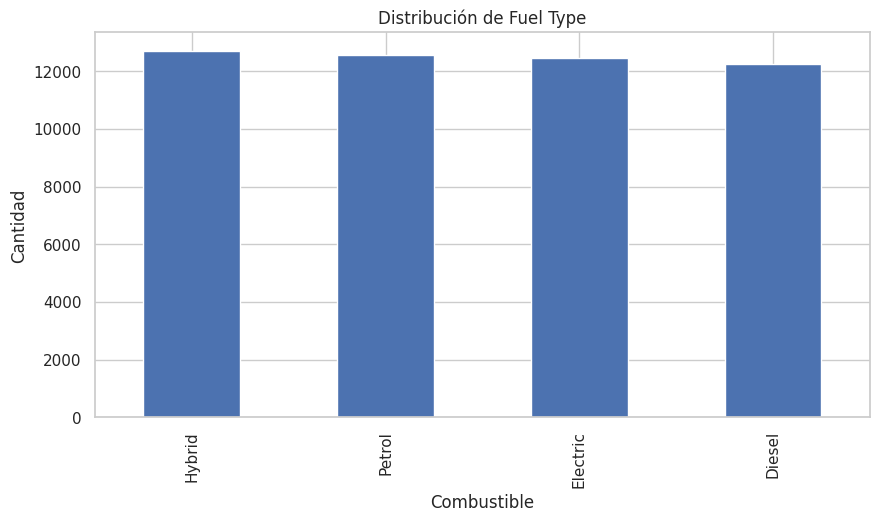

In [21]:
df['Fuel_Type'].value_counts().plot(kind="bar")
plt.title("Distribución de Fuel Type")
plt.xlabel("Combustible")
plt.ylabel("Cantidad")
plt.show()

Los tipos Híbrido, Gasolina, Eléctrico y Diésel tienen cantidades casi iguales.
Esto muestra que el conjunto de datos está diversificado:
Esto implica que el conjunto de datos no favorece un tipo de combustible en particular y que se pueden realizar análisis comparativos o modelado sin riesgo de sesgos atribuibles a esta categoría.

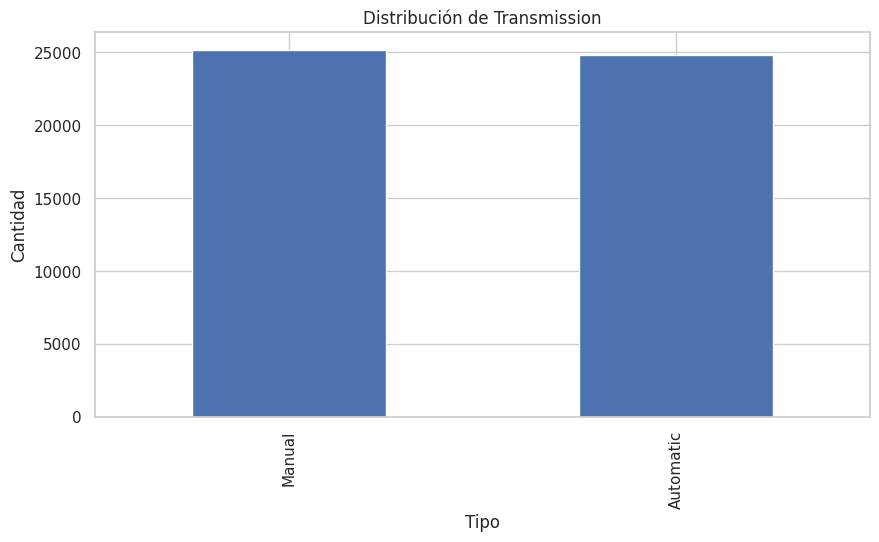

In [22]:
df['Transmission'].value_counts().plot(kind="bar")
plt.title("Distribución de Transmission")
plt.xlabel("Tipo")
plt.ylabel("Cantidad")
plt.show()

Las transmisiones Manual y Automática tienen valores muy similares.
Esto implica que el conjunto de datos no favorece un tipo de combustible en particular y que se pueden realizar análisis comparativos o modelado sin riesgo de sesgos atribuibles a esta categoría.

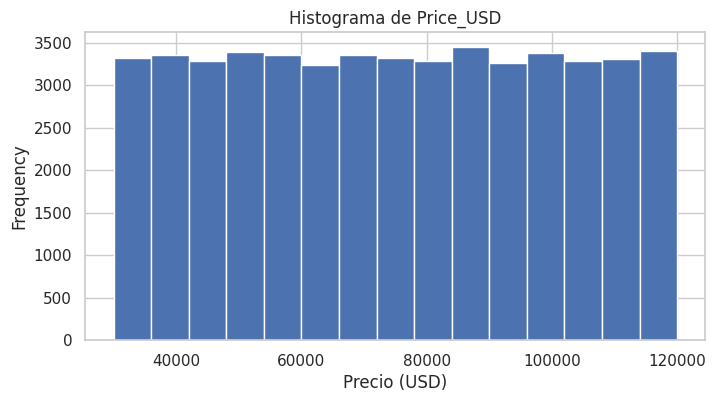

In [23]:
df['Price_USD'].plot(kind="hist", bins=15, figsize=(8,4))
plt.title("Histograma de Price_USD")
plt.xlabel("Precio (USD)")
plt.show()

El histograma muestra que los precios están relativamente uniformemente distribuidos entre 30 000 y 120 000 USD.No se observan picos pronunciados, ausencia de sesgos fuertes o concentraciones dominantes en un rango específico.

Esto sugiere que el dataset contiene vehículos de diferentes gamas de precio, sin predominio claro de un segmento.

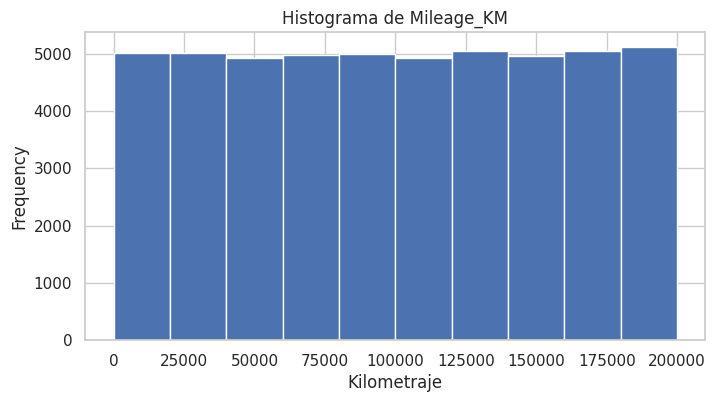

In [24]:
df['Mileage_KM'].plot(kind="hist", bins=10, figsize=(8,4))
plt.title("Histograma de Mileage_KM")
plt.xlabel("Kilometraje")
plt.show()

La distribución de kilometraje también es amplia y uniforme, con valores desde 0 hasta 200 000 km.

No existen acumulaciones fuertes en rangos bajos o altos, indicando que el dataset cubre vehículos muy nuevos y muy usados en proporciones similares.

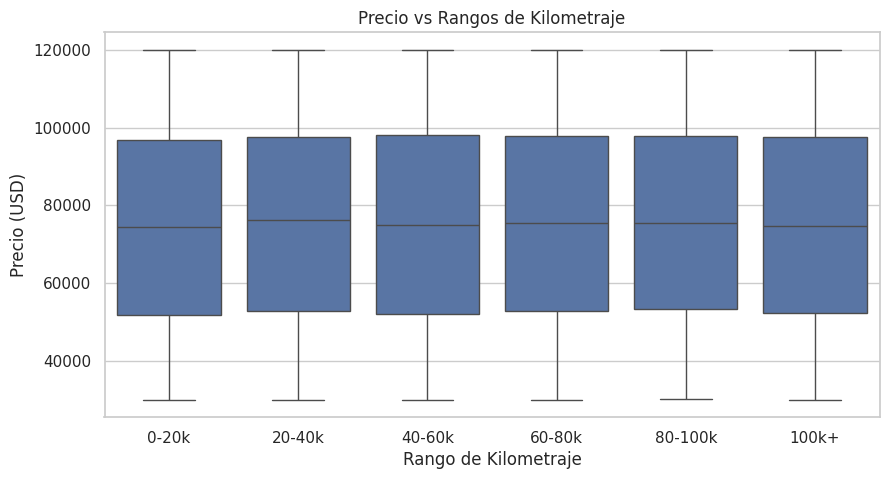

In [25]:
df['Mileage_Group'] = pd.cut(df['Mileage_KM'],
                             bins=[0, 20000, 40000, 60000, 80000, 100000, df['Mileage_KM'].max()],
                             labels=['0-20k', '20-40k', '40-60k', '60-80k', '80-100k', '100k+'])

plt.figure(figsize=(10,5))
sns.boxplot(x="Mileage_Group", y="Price_USD", data=df)
plt.title("Precio vs Rangos de Kilometraje")
plt.xlabel("Rango de Kilometraje")
plt.ylabel("Precio (USD)")
plt.show()

Se observa una tendencia negativa leve: cuando el kilometraje aumenta, el precio tiende a bajar.

Sin embargo, la relación no es muy marcada es decir que el kilometraje influye, pero no es el factor dominante en el precio.

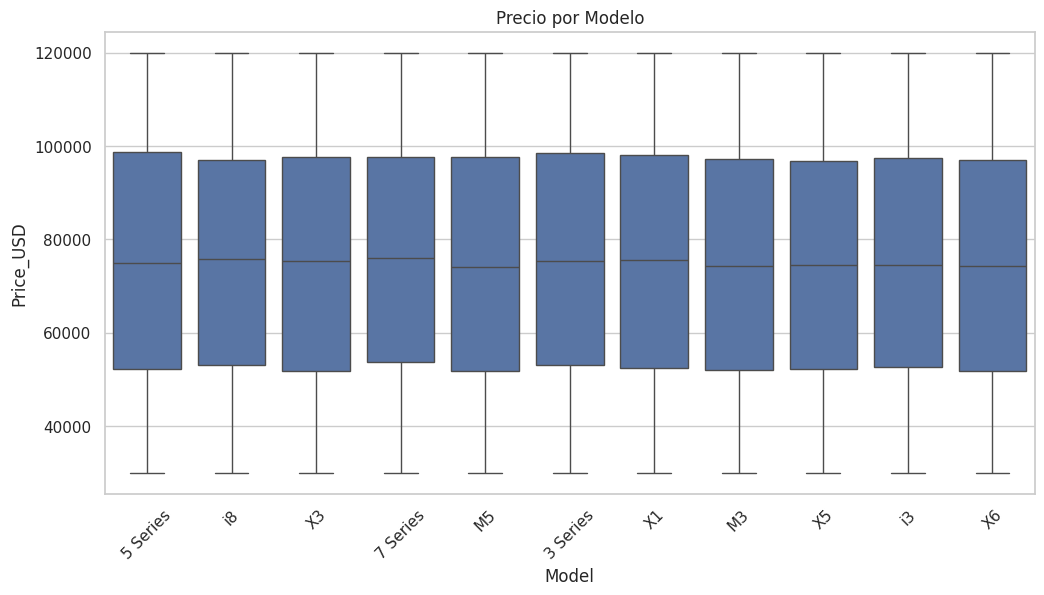

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Model", y="Price_USD", data=df)
plt.xticks(rotation=45)
plt.title("Precio por Modelo")
plt.show()

Los boxplots muestran que los diferentes modelos tienen precios bastante similares.ya que la mediana de la mayoría de modelos está entre 80 000 y 100 000 USD.

Falta de variabilidad notable entre modelos, estos podrían estar normalizados o pertenecer a segmentos de gama similar.

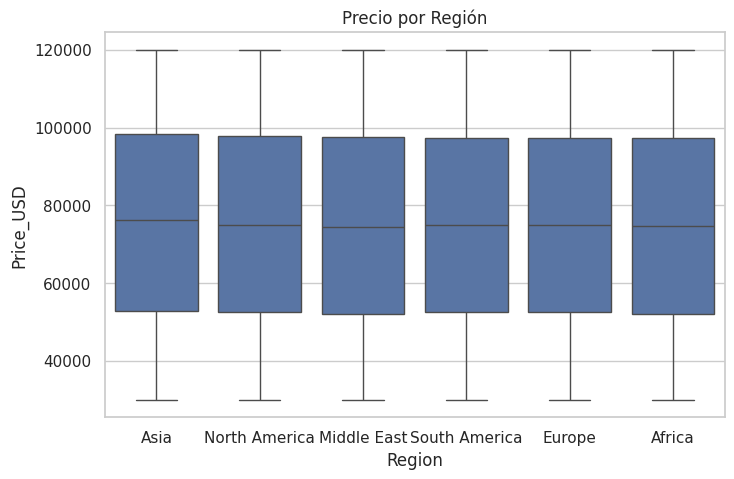

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Region", y="Price_USD", data=df)
plt.title("Precio por Región")
plt.show()

Las regiones muestran comportamientos homogéneos en precio. Las medianas varían muy poco entre regiones.

No existe un efecto geográfico fuerte sobre el precio y el dataset podría estar balanceado o los precios ajustados por mercado.

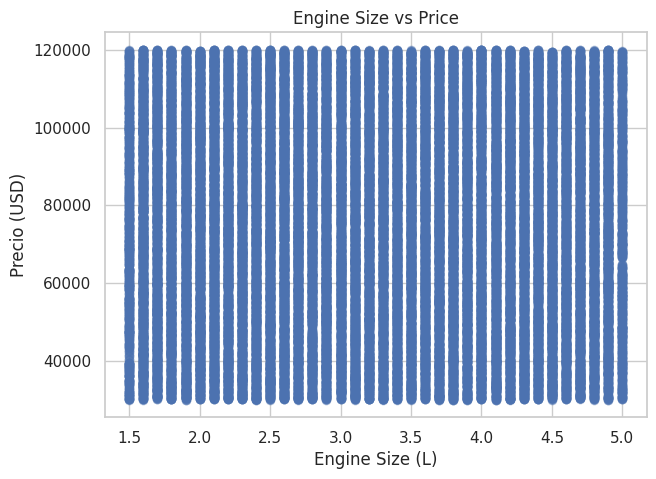

In [28]:
plt.figure(figsize=(7,5))
plt.scatter(df['Engine_Size_L'], df['Price_USD'], alpha=0.4)
plt.title("Engine Size vs Price")
plt.xlabel("Engine Size (L)")
plt.ylabel("Precio (USD)")
plt.show()

No existe una relación lineal clara entre tamaño del motor y precio.
Para cualquier tamaño del motor (1.5 L a 5.0 L), los precios se distribuyen casi igual.